# PROGRAM 32
### Aim  : Convolutional Neural Network(CNN)
### Date : 10/11/2022
### By    : Anu C Scharia

pip install tensorflow

In [24]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [25]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

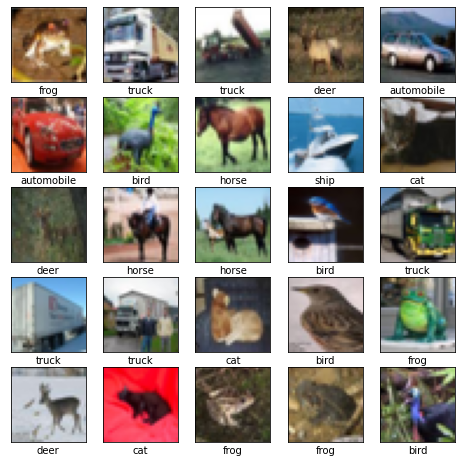

In [26]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()    

In [27]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3, 3), activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [29]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [32]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10


2022-11-10 14:15:15.882976: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 153600000 exceeds 10% of free system memory.


1563/1563 [==============================] - 34s 21ms/step - loss: 1.7288 - accuracy: 0.3982 - val_loss: 1.3940 - val_accuracy: 0.4991
Epoch 2/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3153 - accuracy: 0.5309 - val_loss: 1.2706 - val_accuracy: 0.5509
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1636 - accuracy: 0.5882 - val_loss: 1.1604 - val_accuracy: 0.5913
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0653 - accuracy: 0.6254 - val_loss: 1.1057 - val_accuracy: 0.6183
Epoch 5/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9774 - accuracy: 0.6567 - val_loss: 1.0859 - val_accuracy: 0.6336
Epoch 6/10
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9156 - accuracy: 0.6798 - val_loss: 1.0240 - val_accuracy: 0.6568
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8550 - accuracy: 0.7013 - val_loss: 1.0911 - val_accura

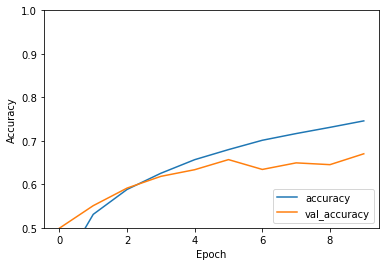

In [35]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

In [36]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
('Test accuracy is ',test_acc)

313/313 - 2s - loss: 1.0308 - accuracy: 0.6702 - 2s/epoch - 7ms/step


('Test accuracy is ', 0.670199990272522)